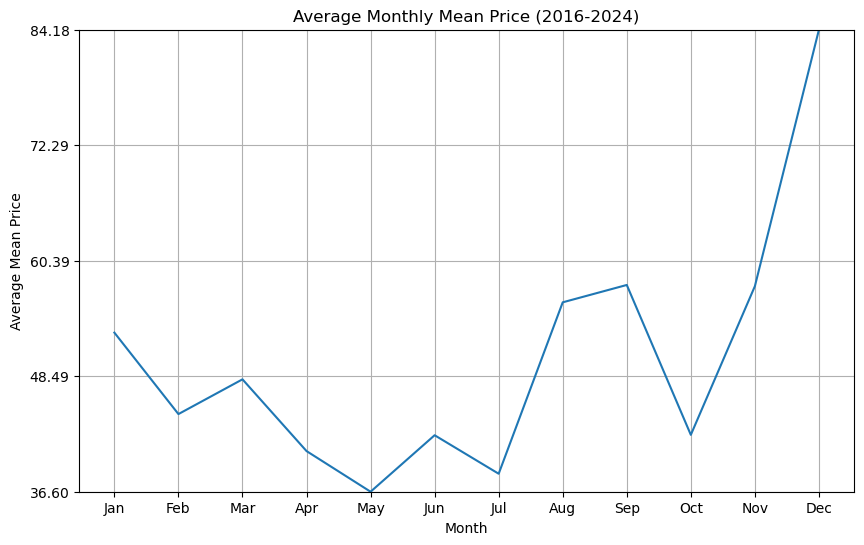

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('merged_energy_prices.csv')

# Extract month
df['Month'] = pd.to_datetime(df['Year-Month']).dt.strftime('%b')

# Group by month, calculate average mean price for each month across all years
monthly_avg = df.groupby('Month')['Mean_Price'].mean()

# Sort the 'monthly_avg' Series by month (crucial step)
# We need to define the order of the months for sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg = monthly_avg.reindex(month_order)

min_price = monthly_avg.min()
max_price = monthly_avg.max()

# Calculate intermediate points for intervals
num_intervals = 4
interval_values = np.linspace(min_price, max_price, num_intervals + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg)
plt.xlabel("Month")
plt.ylabel("Average Mean Price")
plt.title("Average Monthly Mean Price (2016-2024)")

#The range is now correct.  
plt.xticks(range(len(monthly_avg.index)), monthly_avg.index)

# Set y-axis limits and ticks
plt.ylim(min_price, max_price)
plt.yticks(interval_values)

plt.grid(True)
plt.show()

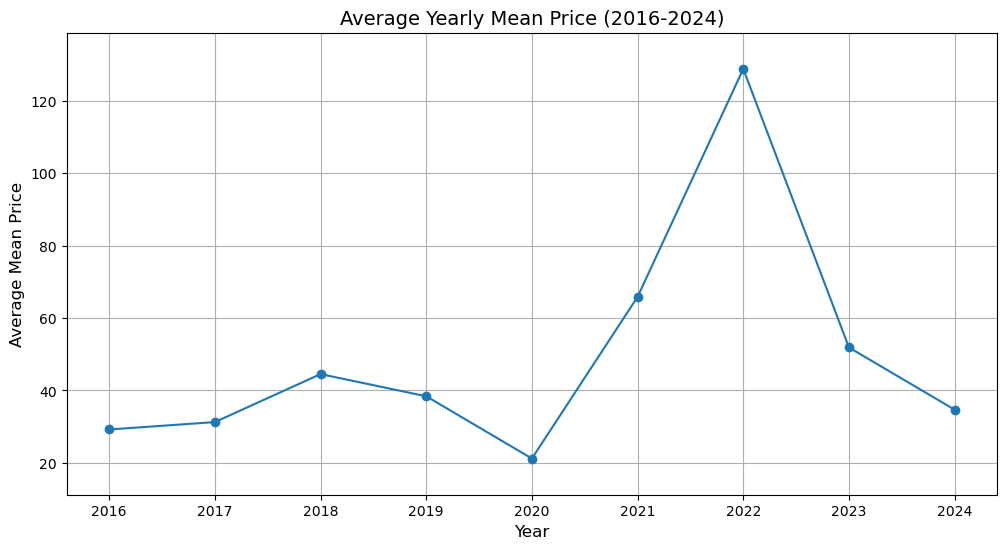

In [18]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') #Errors='coerce' handles potential non-numeric values.

# 2. Remove rows with NaN values in the 'Year' column (if any).
df = df.dropna(subset=['Year'])

# 3. Convert 'Year' column to integer type for consistency (optional but recommended).
df['Year'] = df['Year'].astype(int)

# --- DATA AGGREGATION ---

# Group data by year and calculate the average mean price.
yearly_averages = df.groupby('Year')['Mean_Price'].mean()

# --- PLOTTING ---

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(yearly_averages.index, yearly_averages.values, marker='o', linestyle='-') #Use index for x-coordinates.
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Mean Price", fontsize=12)
plt.title("Average Yearly Mean Price (2016-2024)", fontsize=14)

# Set y-axis limits (optional, for better visualization).
min_price = yearly_averages.min()
max_price = yearly_averages.max()
buffer = 10
plt.ylim(min_price - buffer, max_price + buffer)

# Set x-axis ticks (optional, if you want specific years).
plt.xticks(yearly_averages.index) #Matplotlib now automatically uses the year values as ticks.

plt.grid(True)
plt.show()